In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
housing = pd.read_csv("/content/drive/My Drive/Colab Notebooks/House Price Prediction Kaggle's competition/Input/train.csv")
df = pd.DataFrame(housing)

housing_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/House Price Prediction Kaggle's competition/Input/test.csv")
df_test = pd.DataFrame(housing_test)
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,

In [5]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [4]:
print(df.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [6]:
df = pd.concat([df, df_test], ignore_index=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
df.shape

(2919, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [9]:
df.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)
df.shape

(2919, 78)

In [10]:
df.MSZoning.value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [11]:
df_lots = df[["LotFrontage", "LotArea", "LotConfig", "LotShape"]]
group_lots = df_lots.groupby(["LotShape"])
group_lots.mean()

,LotFrontage,LotArea
LotShape,,
IR1,75.180835,11620.964876
IR2,67.437500,18913.065789
IR3,117.636364,32064.187500
Reg,66.848871,8865.632598


In [12]:
df_LotFrontage_NA = df_lots.loc[(df["LotFrontage"].isnull())]
df_LotFrontage_NA.columns

Index(['LotFrontage', 'LotArea', 'LotConfig', 'LotShape'], dtype='object')

In [13]:
df_LotFrontage_NA.isnull().sum()

LotFrontage    486
LotArea          0
LotConfig        0
LotShape         0
dtype: int64

In [15]:
df_LotFrontage_NA.head(10)

,LotFrontage,LotArea,LotConfig,LotShape
7,NaN,10382,Corner,IR1
12,NaN,12968,Inside,IR2
14,NaN,10920,Corner,IR1
16,NaN,11241,CulDSac,IR1
24,NaN,8246,Inside,IR1
31,NaN,8544,CulDSac,IR1
42,NaN,9180,CulDSac,IR1
43,NaN,9200,CulDSac,IR1
50,NaN,13869,Corner,IR2
64,NaN,9375,Inside,Reg


In [16]:
df_LotFrontage_NA["LotFrontage"] = df_LotFrontage_NA.apply(lambda x: 76.00 if (x[3] == "IR1") else x[0], axis=1)
df_LotFrontage_NA["LotFrontage"] = df_LotFrontage_NA.apply(lambda x: 76.50 if (x[3] == "IR2") else x[0], axis=1)
df_LotFrontage_NA["LotFrontage"] = df_LotFrontage_NA.apply(lambda x: 138.43 if (x[3] == "IR3") else x[0], axis=1)
df_LotFrontage_NA["LotFrontage"] = df_LotFrontage_NA.apply(lambda x: 67.05 if (x[3] == "Reg") else x[0], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [17]:
df_LotFrontage_NA.isnull().sum()

LotFrontage    0
LotArea        0
LotConfig      0
LotShape       0
dtype: int64

In [0]:
LotFront_fills = df_LotFrontage_NA.LotFrontage
df.loc[df.LotFrontage.isnull(), 'LotFrontage'] = LotFront_fills

In [19]:
df.LotFrontage.isnull().sum()

0

In [0]:
df["Age"] = df.apply(lambda x: x["YrSold"] - x["YearBuilt"] 
if (x["YearBuilt"] < x["YearRemodAdd"])
else (x["YrSold"] - x["YearRemodAdd"]), axis=1)

Text(0.5, 0, 'Sale Price, $')

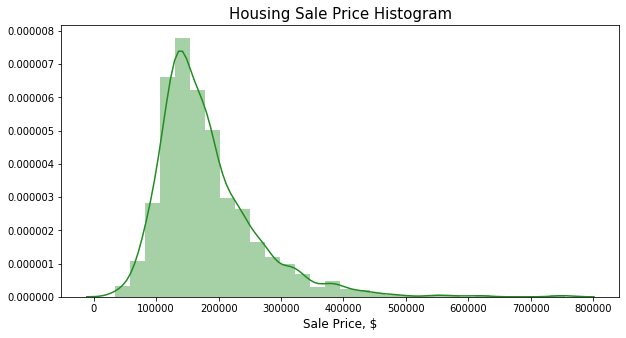

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(df.SalePrice, bins=30, kde=True, ax=ax, color='forestgreen')
plt.title("Housing Sale Price Histogram", fontsize=15)
plt.xlabel("Sale Price, $", fontsize=12)

In [22]:
df[["BsmtFinSF1", "BsmtFinSF2", "TotalBsmtSF", "BsmtUnfSF"]].head()

,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtUnfSF
0,706.0,0.0,856.0,150.0
1,978.0,0.0,1262.0,284.0
2,486.0,0.0,920.0,434.0
3,216.0,0.0,756.0,540.0
4,655.0,0.0,1145.0,490.0


In [23]:
df[["GrLivArea", "1stFlrSF", "2ndFlrSF"]].head()

,GrLivArea,1stFlrSF,2ndFlrSF
0,1710,856,854
1,1262,1262,0
2,1786,920,866
3,1717,961,756
4,2198,1145,1053


In [24]:
df.GrLivArea.describe()

count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
25%      1126.000000
50%      1444.000000
75%      1743.500000
max      5642.000000
Name: GrLivArea, dtype: float64

In [0]:
df["BaseLivArea"] = df.TotalBsmtSF - df.BsmtUnfSF

Text(0.5, 1.0, 'Above Grade Square Footage vs Basement Square Footage')

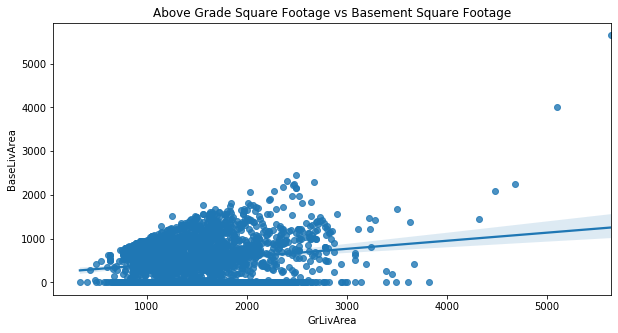

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x="GrLivArea", y="BaseLivArea", data=df)
ax.set_title("Above Grade Square Footage vs Basement Square Footage")

In [27]:
df[["SalePrice", "GrLivArea", "BaseLivArea"]].describe()

,SalePrice,GrLivArea,BaseLivArea
count,1460.000000,2919.000000,2918.000000
mean,180921.195890,1500.759849,491.005483
std,79442.502883,506.051045,477.205053
min,34900.000000,334.000000,0.000000
25%,129975.000000,1126.000000,0.000000
50%,163000.000000,1444.000000,457.500000
75%,214000.000000,1743.500000,805.750000
max,755000.000000,5642.000000,5644.000000


### searching for outliers

In [28]:
df.SalePrice[(df.SalePrice > 181654.942068 + 3*79176.4852)].count()

22

In [29]:
df.SalePrice[(df.SalePrice < 181654.942068 - 2.5*79176.4852)].count()

0

In [30]:
df.GrLivArea[(df.GrLivArea > 1517.6986 + 3*525.15)].count()

21

In [31]:
df.BaseLivArea[(df.BaseLivArea > 492.033 + 3*476.3)].count()

16

In [32]:
df.shape

(2919, 80)

In [33]:
df_exout = df[(df.SalePrice < 181654.942068 + 3*79176.4852) | (df.SalePrice.isnull())]
df_exout = df_exout[(df_exout.GrLivArea < 1517.6986 + 3*525.15) | (df.SalePrice.isnull())]
df_exout = df_exout[(df_exout.BaseLivArea < 492.033 + 3*476.3) | (df.SalePrice.isnull())]
df_exout.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(2887, 80)

In [34]:
df_exout.shape

(2887, 80)

In [0]:
df_exout["PriceSF"] = df_exout.SalePrice / df_exout.GrLivArea

In [36]:
df_exout.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,...,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Age,BaseLivArea,PriceSF
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,...,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008,5,706.0,121.929825
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,...,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,31,978.0,143.819334
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,...,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008,7,486.0,125.139978
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,...,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006,91,216.0,81.537566
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,...,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,8,655.0,113.739763
5,796,566,320,1,1Fam,TA,No,732.0,0.0,GLQ,Unf,1.0,0.0,Gd,64.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,NaN,0,Wood,1,Typ,480.0,2.0,TA,Unf,TA,Attchd,1993.0,1362,1,GasA,...,1.5Fin,6,1,TA,Lvl,Gtl,14115,Inside,85.0,IR1,0,50,RL,0.0,None,700,10,Mitchel,30,5,5,Y,0,CompShg,Gable,Normal,143000.0,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009,16,732.0,104.992658
6,1694,0,0,3,1Fam,TA,Av,1369.0,0.0,GLQ,Unf,1.0,0.0,Ex,317.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,636.0,2.0,TA,RFn,TA,Attchd,2004.0,1694,0,GasA,...,1Story,7,1,Gd,Lvl,Gtl,10084,Inside,75.0,Reg,0,20,RL,186.0,Stone,0,8,Somerst,57,5,8,Y,0,CompShg,Gable,Normal,307000.0,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007,3,1369.0,181.227863
7,1107,983,0,3,1Fam,TA,Mn,859.0,32.0,ALQ,BLQ,1.0,0.0,Gd,216.0,Y,PosN,Norm,SBrkr,228,TA,TA,HdBoard,HdBoard,NaN,TA,2,CBlock,2,Typ,484.0,2.0,TA,RFn,TA,Attchd,1973.0,2090,1,GasA,...,2Story,8,1,TA,Lvl,Gtl,10382,Corner,76.0,IR1,0,60,RL,240.0,Stone,350,11,NWAmes,204,6,7,Y,0,CompShg,Gable,Normal,200000.0,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009,36,891.0,95.693780
8,1022,752,0,2,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,952.0,Y,Artery,Norm,FuseF,205,TA,TA,BrkFace,Wd Shng,NaN,TA,2,BrkTil,2,Min1,468.0,2.0,TA,Unf,Fa,Detchd,1931.0,1774,0,GasA,...,1.5Fin,9,2,TA,Lvl,Gtl,6120,Inside,51.0,Reg,0,50,RM,0.0,None,0,4,OldTown,0,5,7,Y,0,CompShg,Gable,Abnorml,129900.0,WD,0,Pave,8,952.0,AllPub,9

### Log transformation of the target variable

In [0]:
df_exout["LnSalePrice"] = np.log(df_exout.SalePrice)
df_exout["LnPriceSF"] = np.log(df_exout.PriceSF)

### Creating a "Location" variable

In [38]:
neigh_mean = df_exout["PriceSF"].groupby(df_exout["Neighborhood"]).count().sort_values()
neigh_mean

Neighborhood
Blueste      2
NPkVill      9
Veenker     11
BrDale      16
MeadowV     17
Blmngtn     17
StoneBr     21
SWISU       24
ClearCr     28
NoRidge     35
IDOTRR      37
Timber      37
Crawfor     49
Mitchel     49
BrkSide     58
SawyerW     58
NridgHt     67
NWAmes      73
Sawyer      74
Gilbert     79
Somerst     85
Edwards     98
OldTown    111
CollgCr    149
NAmes      224
Name: PriceSF, dtype: int64

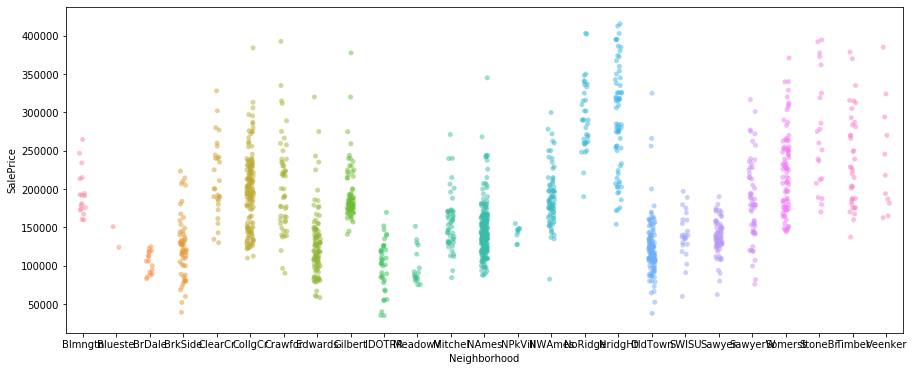

In [39]:
fig, ax = plt.subplots(figsize=(15,6))

sns.stripplot(x = df_exout.Neighborhood, y = df_exout.SalePrice, order = np.sort(df_exout.Neighborhood.unique()), jitter=0.1, alpha=0.5)

In [40]:
df_exout["Functional"]

0       Typ
1       Typ
2       Typ
3       Typ
4       Typ
       ... 
2914    Typ
2915    Typ
2916    Typ
2917    Typ
2918    Typ
Name: Functional, Length: 2887, dtype: object

In [41]:
def functional_metric(x):
    if x == "Typ":
        return 8
    elif x == "Min1":
        return 7
    elif x == "Min2":
        return 6
    elif x == "Mod":
        return 5
    elif x == "Maj1":
        return 4
    elif x == "Maj2":
        return 3
    elif x == "Sev":
        return 2
    else:
        return 1

df_exout["Functional_Num"] = df_exout.Functional.map(functional_metric)
df_exout.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,...,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Age,BaseLivArea,PriceSF,LnSalePrice,LnPriceSF,Functional_Num
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,...,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008,5,706.0,121.929825,12.247694,4.803446,8
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,...,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,31,978.0,143.819334,12.109011,4.968558,8
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,...,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008,7,486.0,125.139978,12.317167,4.829433,8
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,...,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006,91,216.0,81.537566,11.849398,4.401064,8
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,...,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,8,655.0,113.739763,12.429216,4.733913,8
5,796,566,320,1,1Fam,TA,No,732.0,0.0,GLQ,Unf,1.0,0.0,Gd,64.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,NaN,0,Wood,1,Typ,480.0,2.0,TA,Unf,TA,Attchd,1993.0,1362,1,GasA,...,TA,Lvl,Gtl,14115,Inside,85.0,IR1,0,50,RL,0.0,None,700,10,Mitchel,30,5,5,Y,0,CompShg,Gable,Normal,143000.0,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009,16,732.0,104.992658,11.870600,4.653890,8
6,1694,0,0,3,1Fam,TA,Av,1369.0,0.0,GLQ,Unf,1.0,0.0,Ex,317.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,636.0,2.0,TA,RFn,TA,Attchd,2004.0,1694,0,GasA,...,Gd,Lvl,Gtl,10084,Inside,75.0,Reg,0,20,RL,186.0,Stone,0,8,Somerst,57,5,8,Y,0,CompShg,Gable,Normal,307000.0,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007,3,1369.0,181.227863,12.634603,5.199755,8
7,1107,983,0,3,1Fam,TA,Mn,859.0,32.0,ALQ,BLQ,1.0,0.0,Gd,216.0,Y,PosN,Norm,SBrkr,228,TA,TA,HdBoard,HdBoard,NaN,TA,2,CBlock,2,Typ,484.0,2.0,TA,RFn,TA,Attchd,1973.0,2090,1,GasA,...,TA,Lvl,Gtl,10382,Corner,76.0,IR1,0,60,RL,240.0,Stone,350,11,NWAmes,204,6,7,Y,0,CompShg,Gable,Normal,200000.0,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009,36,891.0,95.693780,12.206073,4.561153,8
8,1022,752,0,2,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,952.0,Y,Artery,Norm,FuseF,205,TA,TA,BrkFace,Wd Shng,NaN,TA,2,BrkTil,2,Min1,468.0,2.0,TA,Unf,Fa,Detchd,1931.0,1774,0,GasA,...,TA,Lvl,Gtl,6120,Inside,51.0,Reg,0,50,RM,0.0,None,

In [42]:
def extercond_metric(x):
    if "Ex" in x:
        return 5
    elif "Gd" in x:
        return 4
    elif "TA" in x:
        return 3
    elif "Fa" in x:
        return 2
    else:
        return 1

df_exout["ExterCond_Num"] = df_exout.ExterCond.map(extercond_metric)
df_exout.ExterCond_Num.value_counts()

3    2510
4     295
2      67
5      12
1       3
Name: ExterCond_Num, dtype: int64

In [43]:
def exterqual_numeric(x):
    if "Ex" in x:
        return 5
    elif "Gd" in x:
        return 4
    elif "TA" in x:
        return 3
    elif "Fa" in x:
        return 2
    else:
        return 1

df_exout["ExterQual_Num"] = df_exout.ExterQual.map(exterqual_numeric)
df_exout.ExterQual_Num.value_counts()

3    1793
4     969
5      91
2      34
Name: ExterQual_Num, dtype: int64

In [44]:
print(df_exout["OverallQual"].mean())
print(df_exout["OverallCond"].mean())
print(df_exout["ExterQual_Num"].mean())
print(df_exout["ExterCond_Num"].mean())
print(df_exout["Functional_Num"].mean())

6.058884655351576
5.565639071700727
3.3869068236924145
3.0852095600969864
7.842743332178732


In [0]:
df_exout["Location"] = ((df_exout["OverallQual"]/df_exout["OverallQual"].mean()) + (df_exout["OverallCond"]/df_exout["OverallCond"].mean()) + (df_exout["ExterQual_Num"]/df_exout["ExterQual_Num"].mean()) + (df_exout["ExterCond_Num"]/df_exout["ExterCond_Num"].mean()) + (df_exout["Functional_Num"]/df_exout["Functional_Num"].mean()))

In [46]:
df_exout.Location

0       5.227149
1       5.305869
2       5.227149
3       4.931894
4       5.392196
          ...   
2914    4.796101
2915    4.436753
2916    4.961148
2917    4.601800
2918    4.931894
Name: Location, Length: 2887, dtype: float64

In [47]:
df_exout.Location.describe()

count    2887.000000
mean        5.000000
std         0.466693
min         2.093510
25%         4.766847
50%         4.978095
75%         5.285275
max         7.384494
Name: Location, dtype: float64

In [48]:
df_exout["Location"].groupby([df_exout.Neighborhood]).mean().sort_values()

Neighborhood
IDOTRR     4.570391
MeadowV    4.632149
Edwards    4.694535
SWISU      4.747014
Sawyer     4.764854
BrDale     4.787943
Mitchel    4.830624
NAmes      4.838784
BrkSide    4.850763
ClearCr    4.887464
OldTown    4.914858
NPkVill    4.932107
Gilbert    5.031108
SawyerW    5.042421
NWAmes     5.052315
CollgCr    5.157713
Crawfor    5.159773
Blueste    5.165903
Blmngtn    5.250727
Timber     5.259234
Somerst    5.293411
NoRidge    5.420054
Veenker    5.493475
StoneBr    5.497825
NridgHt    5.521001
Name: Location, dtype: float64

In [49]:
df_exout["SalePrice"].groupby([df_exout.Neighborhood]).count().sort_values()

Neighborhood
Blueste      2
NPkVill      9
Veenker     11
BrDale      16
MeadowV     17
Blmngtn     17
StoneBr     21
SWISU       24
ClearCr     28
NoRidge     35
IDOTRR      37
Timber      37
Crawfor     49
Mitchel     49
BrkSide     58
SawyerW     58
NridgHt     67
NWAmes      73
Sawyer      74
Gilbert     79
Somerst     85
Edwards     98
OldTown    111
CollgCr    149
NAmes      224
Name: SalePrice, dtype: int64

In [0]:
def add_location(x):
    if "MeadowV" in x or "Edwards" in x or "Sawyer" in x or "IDOTRR" in x or "Brkside" in x or "BrDale" in x:
        return 1
    elif "Swisu" in x or "Mitchel" in x or "NAmes" in x or "NPkVill" in x or "ClearCr" in x or "OldTown" in x or "SawyerW" in x:
        return 2
    elif "Gilbert" in x or "NWAmes" in x or "Blueste" in x or "CollgCr" in x or "Timber" in x or "Crawfor" in x:
        return 3
    else:
        return 4

In [0]:
df_exout["Location"] = df_exout.Neighborhood.map(add_location)

In [52]:
df_exout["Location"].value_counts()

2    860
3    744
4    656
1    627
Name: Location, dtype: int64

In [53]:
print(df_exout["SalePrice"].groupby(df_exout.Location).mean())
print(df_exout["PriceSF"].groupby(df_exout.Location).mean())

Location
1    134463.280000
2    145352.422803
3    199005.966581
4    223266.974843
Name: SalePrice, dtype: float64
Location
1    107.673381
2    111.315854
3    126.419641
4    134.377844
Name: PriceSF, dtype: float64


In [54]:
print(df_exout["GrLivArea"].groupby(df_exout.Location).mean())
print(df_exout["GrLivArea"].groupby(df_exout.Location).median())

Location
1    1292.087719
2    1350.194186
3    1598.299731
4    1710.112805
Name: GrLivArea, dtype: float64
Location
1    1172.0
2    1277.5
3    1600.5
4    1615.0
Name: GrLivArea, dtype: float64


##Other feature engineering on sale year, seasonality, zoning, and proximinity to railway and artery roads

In [55]:
print(df_exout.SalePrice.groupby(df_exout.YrSold).mean())
print(df_exout.PriceSF.groupby(df_exout.YrSold).mean())

YrSold
2006    175375.866013
2007    178779.865625
2008    174613.491639
2009    173784.129518
2010    170551.087719
Name: SalePrice, dtype: float64
YrSold
2006    118.712196
2007    121.168779
2008    121.468162
2009    118.025062
2010    119.720125
Name: PriceSF, dtype: float64


In [56]:
df_exout.PriceSF.groupby(df_exout.YrSold).mean().pct_change()

YrSold
2006         NaN
2007    0.020694
2008    0.002471
2009   -0.028346
2010    0.014362
Name: PriceSF, dtype: float64

In [57]:
df_exout.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
2914    2006
2915    2006
2916    2006
2917    2006
2918    2006
Name: YrSold, Length: 2887, dtype: int64

In [0]:
df_exout = pd.get_dummies(df_exout, columns=["YrSold"])

In [59]:
df_exout.SalePrice.groupby(df_exout.MSZoning).mean()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         126995.600000
RL         184150.067736
RM         123921.615741
Name: SalePrice, dtype: float64

In [0]:
def add_zoning(x):
    if x == "RH":
        return 1
    elif x == "RM":
        return 2
    elif x == "RL":
        return 3
    elif x == "FV":
        return 4
    else:
        return 5

In [0]:
df_exout["Zoning"] = df_exout.MSZoning.map(add_zoning)

In [62]:
df_exout.Zoning.value_counts()

3    2236
2     458
4     139
5      29
1      25
Name: Zoning, dtype: int64

In [63]:
print(df_exout.GrLivArea.groupby(df_exout.Zoning).mean())
print(df_exout.BaseLivArea.groupby(df_exout.Zoning).mean())

Zoning
1    1401.720000
2    1312.412664
3    1517.430680
4    1581.568345
5    1149.448276
Name: GrLivArea, dtype: float64
Zoning
1    431.160000
2    273.402626
3    536.076923
4    385.215827
5    138.103448
Name: BaseLivArea, dtype: float64


In [64]:
print(df_exout.SalePrice.groupby(df_exout.Zoning).mean())
print(df_exout.PriceSF.groupby(df_exout.Zoning).mean())

Zoning
1    126995.600000
2    123921.615741
3    184150.067736
4    214014.061538
5     74528.000000
Name: SalePrice, dtype: float64
Zoning
1     98.189749
2    100.598184
3    123.329410
4    136.280240
5     63.951611
Name: PriceSF, dtype: float64


In [65]:
df_exout.Location.groupby(df_exout.Zoning).value_counts()

Zoning  Location
1       1             8
        4             8
        2             7
        3             2
2       2           205
        1           150
        4            69
        3            34
3       3           708
        2           645
        1           444
        4           439
4       4           139
5       1            25
        2             3
        4             1
Name: Location, dtype: int64

Text(0.5, 1.0, 'Price per Square Feet, $')

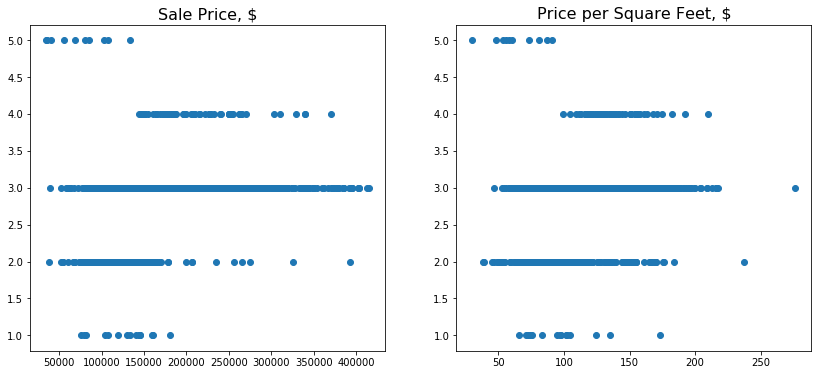

In [66]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))

ax[0].scatter(df_exout.SalePrice, df_exout.Zoning)
ax[0].set_title("Sale Price, $", fontsize=16)
ax[1].scatter(df_exout.PriceSF, df_exout.Zoning)
ax[1].set_title("Price per Square Feet, $", fontsize=16)

In [0]:
df_exout["Zone_ordinal"] = df_exout["Zoning"]
df_exout = pd.get_dummies(df_exout, columns=["Zoning"])

In [68]:
df_exout.Condition1.groupby(df_exout.Condition2).value_counts()

Condition2  Condition1
Artery      Artery           2
            Feedr            1
            RRAn             1
            RRNn             1
Feedr       RRAn             8
            Feedr            4
            RRNn             1
Norm        Norm          2485
            Feedr          153
            Artery          87
            RRAn            40
            PosN            35
            RRAe            28
            PosA            17
            RRNn             7
            RRNe             6
PosA        PosA             3
            Artery           1
PosN        PosN             3
RRAe        Feedr            1
RRAn        Feedr            1
RRNn        Feedr            2
Name: Condition1, dtype: int64

In [0]:
def add_roadrail1(x):
    if "Artery" in x or "RRAn" in x or "RRNn" in x or "RRAe" in x or "RRNe" in x:
        return 1
    else: return 0
df_exout["RoadRail1"] = df_exout.Condition1.map(add_roadrail1)

In [0]:
def add_roadrail2(x):
    if "Artery" in x or "RRAn" in x or "RRNn" in x or "RRAe" in x or "RRNe" in x:
        return 1
    else: return 0
df_exout["RoadRail2"] = df_exout.Condition2.map(add_roadrail2)

In [71]:
df_exout.RoadRail1.groupby(df_exout.RoadRail2).value_counts()

RoadRail2  RoadRail1
0          0            2700
           1             178
1          0               5
           1               4
Name: RoadRail1, dtype: int64

In [0]:
df_exout["RoadRail"] = df_exout.apply(lambda x: 1 if (x["RoadRail1"] == 1 | x["RoadRail2"] == 1)
                                            else 0, axis=1)
df_exout.drop(["RoadRail1", "RoadRail2"], axis=1, inplace=True)

In [73]:
df_exout["RoadRail"].value_counts()

0    2705
1     182
Name: RoadRail, dtype: int64

In [74]:
print(df_exout.SalePrice.groupby([df_exout.RoadRail, df_exout.Location]).mean())
print(df_exout.PriceSF.groupby([df_exout.RoadRail, df_exout.Location]).mean())

RoadRail  Location
0         1           134976.561151
          2           146732.558747
          3           199660.804813
          4           225124.230263
1         1           127977.272727
          2           131442.105263
          3           182678.666667
          4           182938.000000
Name: SalePrice, dtype: float64
RoadRail  Location
0         1           108.411447
          2           113.215217
          3           127.107839
          4           134.708215
1         1            98.346913
          2            92.172275
          3           109.260561
          4           127.204083
Name: PriceSF, dtype: float64


### More(minor) feature engineering

In [75]:
df_exout["CentralAirNum"] = df_exout.apply(lambda x: 1 if (x["CentralAir"] == "Y") else 0, axis=1)
df_exout["CentralAirNum"].value_counts()

1    2691
0     196
Name: CentralAirNum, dtype: int64

In [0]:
def add_amenities1(x):
    if "PosN" in x:
        return 1
    elif "PosA" in x:
        return 1
    else: return 0
df_exout["Amenities1"] = df_exout.Condition1.map(add_amenities1)

In [0]:
def add_amenities2(x):
    if "PosN" in x:
        return 1
    elif "PosA" in x:
        return 1
    else: return 0
df_exout["Amenities2"] = df_exout.Condition1.map(add_amenities2)

In [0]:
df_exout["Amenities"] = df_exout.apply(lambda x: 1 if (x["Amenities1"] == 1 | x["Amenities2"] == 1) else 0, axis=1)
df_exout.drop(["Amenities1", "Amenities2"], axis=1, inplace=True)

In [79]:
df_exout["Amenities"].value_counts()

0    2829
1      58
Name: Amenities, dtype: int64

In [80]:
print(df_exout.SalePrice.groupby([df_exout.Amenities, df_exout.Location]).mean())
print(df_exout.PriceSF.groupby([df_exout.Amenities, df_exout.Location]).mean())

Amenities  Location
0          1           134361.150502
           2           144628.325243
           3           197529.522667
           4           222782.905063
1          1           165000.000000
           2           178500.000000
           3           238553.571429
           4           299750.000000
Name: SalePrice, dtype: float64
Amenities  Location
0          1           107.634477
           2           111.576661
           3           126.709085
           4           134.325627
1          1           119.305857
           2            99.376694
           3           118.666660
           4           142.628173
Name: PriceSF, dtype: float64


In [81]:
df_exout[(df_exout.Utilities != "AllPub")].count()

1stFlrSF         3
2ndFlrSF         3
3SsnPorch        3
BedroomAbvGr     3
BldgType         3
                ..
Zoning_4         3
Zoning_5         3
RoadRail         3
CentralAirNum    3
Amenities        3
Length: 100, dtype: int64

In [82]:
df_exout["Bathrooms"] = df_exout.FullBath + (0.5*df_exout.HalfBath)
df_exout.Bathrooms.describe()

count    2887.000000
mean        1.747142
std         0.634511
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: Bathrooms, dtype: float64

In [83]:
print(df_exout["SalePrice"].groupby([df_exout["OverallQual"]]).mean())
print(df_exout["PriceSF"].groupby([df_exout["OverallQual"]]).mean())

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161500.093834
7     206555.503165
8     267387.421384
9     338378.805556
10    357768.500000
Name: SalePrice, dtype: float64
OverallQual
1      92.571273
2      95.183628
3      79.895426
4     102.401838
5     112.746779
6     114.495311
7     124.511960
8     144.533663
9     175.573212
10    168.946441
Name: PriceSF, dtype: float64


In [84]:
df_exout.OverallQual.corr(df_exout.OverallCond)

-0.09265519672564188

In [85]:
df_exout.OverallQual.corr(df_exout.Location)

0.5501952168666753

In [86]:
print(df_exout.SalePrice.groupby([df_exout.OverallCond]).mean())
print(df_exout.PriceSF.groupby([df_exout.OverallCond]).mean())

OverallCond
1     61000.000000
2    141986.400000
3    101929.400000
4    118392.696429
5    195079.577889
6    150736.884000
7    157940.318627
8    155651.736111
9    189531.578947
Name: SalePrice, dtype: float64
OverallCond
1     67.477876
2     87.609156
3     81.774337
4     84.702728
5    126.214984
6    113.498657
7    117.249415
8    119.637033
9    126.716306
Name: PriceSF, dtype: float64


### Dummifying other pothential important features

In [0]:
df_exout = pd.get_dummies(df_exout, columns=["Street"])

In [88]:
df_exout.drop(["Street_Grvl"], axis=1, inplace=True)
df_exout.rename(columns={"Street_Pave": "Street_dum"}, inplace=True)
df_exout.Street_dum

0       1
1       1
2       1
3       1
4       1
       ..
2914    1
2915    1
2916    1
2917    1
2918    1
Name: Street_dum, Length: 2887, dtype: uint8

In [0]:
df_exout = pd.get_dummies(df_exout, columns=["KitchenQual"])

In [0]:
df_exout["FlatRoof_dum"] = df_exout.RoofStyle.apply(lambda x: 1 if x=="Flat" else 0)

In [0]:
df_exout["Garage_dum"] = df_exout.GarageQual.apply(lambda x: 0 if pd.isnull(x) == True else 1)

In [0]:
df_exout["FlatContour_dum"] = df_exout.LandContour.apply(lambda x: 1 if x=="Lvl" else 0)

In [0]:
df_exout["TwoStory_dum"] = df_exout["2ndFlrSF"].apply(lambda x: 1 if x>0 else 0)

In [94]:
df_exout.shape

(2887, 108)

# Regression 

In [0]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

from sklearn import metrics, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import shapiro

In [97]:
X_pred = df_exout[df_exout.SalePrice.isnull()].drop(columns=["SalePrice"])
X_train = df_exout[df_exout.SalePrice.notna()]
print(X_pred.shape)
print(X_train.shape)

(1459, 107)
(1428, 108)


## Regression model

In [0]:
y_lnSP = X_train["LnSalePrice"]

In [0]:
X_fin = X_train[['Age', 'GrLivArea', 'BaseLivArea', 'Location', 'Amenities', 'RoadRail', 'BedroomAbvGr', 'Bathrooms', 
                  'OverallCond', 'OverallQual', 'LotFrontage', 'LotArea', 'TwoStory_dum', 'FlatContour_dum', 'FlatRoof_dum', 
                  'GarageArea', 'Garage_dum', 'CentralAirNum', 'LowQualFinSF', 'Fireplaces', 'KitchenQual_Ex', 
                  'Zoning_2', 'Zoning_3', 'Zoning_4', 'YrSold_2007', 'YrSold_2008', 'YrSold_2009', 'YrSold_2010']]
X_pred = X_pred[['Age', 'GrLivArea', 'BaseLivArea', 'Location', 'Amenities', 'RoadRail', 'BedroomAbvGr', 'Bathrooms', 
                  'OverallCond', 'OverallQual', 'LotFrontage', 'LotArea', 'TwoStory_dum', 'FlatContour_dum', 'FlatRoof_dum', 
                  'GarageArea', 'Garage_dum', 'CentralAirNum', 'LowQualFinSF', 'Fireplaces', 'KitchenQual_Ex', 
                  'Zoning_2', 'Zoning_3', 'Zoning_4', 'YrSold_2007', 'YrSold_2008', 'YrSold_2009', 'YrSold_2010']]

In [100]:
X_fin.shape
X_fin.head(10)

,Age,GrLivArea,BaseLivArea,Location,Amenities,RoadRail,BedroomAbvGr,Bathrooms,OverallCond,OverallQual,LotFrontage,LotArea,TwoStory_dum,FlatContour_dum,FlatRoof_dum,GarageArea,Garage_dum,CentralAirNum,LowQualFinSF,Fireplaces,KitchenQual_Ex,Zoning_2,Zoning_3,Zoning_4,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,5,1710,706.0,3,0,0,3,2.5,5,7,65.0,8450,1,1,0,548.0,1,1,0,0,0,0,1,0,0,1,0,0
1,31,1262,978.0,4,0,0,3,2.0,8,6,80.0,9600,0,1,0,460.0,1,1,0,1,0,0,1,0,1,0,0,0
2,7,1786,486.0,3,0,0,3,2.5,5,7,68.0,11250,1,1,0,608.0,1,1,0,1,0,0,1,0,0,1,0,0
3,91,1717,216.0,3,0,0,3,1.0,5,7,60.0,9550,1,1,0,642.0,1,1,0,1,0,0,1,0,0,0,0,0
4,8,2198,655.0,4,0,0,4,2.5,5,8,84.0,14260,1,1,0,836.0,1,1,0,1,0,0,1,0,0,1,0,0
5,16,1362,732.0,2,0,0,1,1.5,5,5,85.0,14115,1,1,0,480.0,1,1,0,0,0,0,1,0,0,0,1,0
6,3,1694,1369.0,4,0,0,3,2.0,5,8,75.0,10084,0,1,0,636.0,1,1,0,1,0,0,1,0,1,0,0,0
7,36,2090,891.0,3,1,0,3,2.5,6,7,76.0,10382,1,1,0,484.0,1,1,0,2,0,0,1,0,0,0,1,0
8,77,1774,0.0,2,0,1,2,2.0,5,7,51.0,6120,1,1,0,468.0,1,1,0,2,0,1,0,0,0,1,0,0
9,69,1077,851.0,4,0,1,2,1.0,6,5,50.0,7420,0,1,0,205.0,1,1,0,2,0,0,1,0,0,1,0,0


In [101]:
scaler = StandardScaler()
X_fin = pd.DataFrame(scaler.fit_transform(X_fin), columns=X_fin.columns)
X_pred = pd.DataFrame(scaler.fit_transform(X_pred), columns=X_pred.columns)
X_fin.head(10)

,Age,GrLivArea,BaseLivArea,Location,Amenities,RoadRail,BedroomAbvGr,Bathrooms,OverallCond,OverallQual,LotFrontage,LotArea,TwoStory_dum,FlatContour_dum,FlatRoof_dum,GarageArea,Garage_dum,CentralAirNum,LowQualFinSF,Fireplaces,KitchenQual_Ex,Zoning_2,Zoning_3,Zoning_4,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,-1.061968,0.499351,0.532643,0.466117,-0.136180,-0.257813,0.182494,1.237944,-0.520636,0.725381,-0.246309,-0.210350,1.161329,0.332295,-0.09585,0.397862,0.243613,0.26696,-0.113219,-0.938817,-0.245222,-0.422159,0.522233,-0.218378,-0.537409,1.943173,-0.550381,-0.368834
1,-0.195345,-0.475357,1.153358,1.412938,-0.136180,-0.257813,0.182494,0.429630,2.182886,-0.029058,0.470391,-0.070113,-0.861083,0.332295,-0.09585,-0.027062,0.243613,0.26696,-0.113219,0.638395,-0.245222,-0.422159,0.522233,-0.218378,1.860779,-0.514622,-0.550381,-0.368834
2,-0.995305,0.664703,0.030593,0.466117,-0.136180,-0.257813,0.182494,1.237944,-0.520636,0.725381,-0.102969,0.131097,1.161329,0.332295,-0.09585,0.687583,0.243613,0.26696,-0.113219,0.638395,-0.245222,-0.422159,0.522233,-0.218378,-0.537409,1.943173,-0.550381,-0.368834
3,1.804554,0.514581,-0.585558,0.466117,-0.136180,-0.257813,0.182494,-1.187000,-0.520636,0.725381,-0.485209,-0.076210,1.161329,0.332295,-0.09585,0.851758,0.243613,0.26696,-0.113219,0.638395,-0.245222,-0.422159,0.522233,-0.218378,-0.537409,-0.514622,-0.550381,-0.368834
4,-0.961973,1.561086,0.416259,1.412938,-0.136180,-0.257813,1.435388,1.237944,-0.520636,1.479820,0.661511,0.498152,1.161329,0.332295,-0.09585,1.788521,0.243613,0.26696,-0.113219,0.638395,-0.245222,-0.422159,0.522233,-0.218378,-0.537409,1.943173,-0.550381,-0.368834
5,-0.695320,-0.257788,0.591976,-0.480704,-0.136180,-0.257813,-2.323293,-0.378685,-0.520636,-0.783496,0.709291,0.480470,1.161329,0.332295,-0.09585,0.069512,0.243613,0.26696,-0.113219,-0.938817,-0.245222,-0.422159,0.522233,-0.218378,-0.537409,-0.514622,1.816922,-0.368834
6,-1.128631,0.464540,2.045637,1.412938,-0.136180,-0.257813,0.182494,0.429630,-0.520636,1.479820,0.231491,-0.011091,-0.861083,0.332295,-0.09585,0.822786,0.243613,0.26696,-0.113219,0.638395,-0.245222,-0.422159,0.522233,-0.218378,1.860779,-0.514622,-0.550381,-0.368834
7,-0.028687,1.326112,0.954821,0.466117,7.343233,-0.257813,0.182494,1.237944,0.380538,0.725381,0.279271,0.025248,1.161329,0.332295,-0.09585,0.088827,0.243613,0.26696,-0.113219,2.215608,-0.245222,-0.422159,0.522233,-0.218378,-0.537409,-0.514622,1.816922,-0.368834
8,1.337911,0.638595,-1.078479,-0.480704,-0.136180,3.878781,-1.070399,0.429630,-0.520636,0.725381,-0.915229,-0.494483,1.161329,0.332295,-0.09585,0.011568,0.243613,0.26696,-0.113219,2.215608,-0.245222,2.368778,-1.914854,-0.218378,-0.537409,1.943173,-0.550381,-0.368834
9,1.071258,-0.877859,0.863539,1.412938,-0.136180,3.878781,-1.070399,-1.187000,0.380538,-0.783496,-0.963009,-0.335954,-0.861083,0.332295,-0.09585,-1.258374,0.243613,0.26696,-0.113219,2.215608,-0.245222,-0.422159,0.522233,-0.218378,-0.537409,1.943173,-0.550381,-0.368834


In [111]:
ols = LinearRegression()
ols.fit(X_fin, y_lnSP)
predictions = ols.predict(X_fin)

print("R-squared:", ols.score(X_fin, y_lnSP))
print("Mean Squared Error:", metrics.mean_squared_error(y_lnSP, predictions))
print("Root Mean Squared Error:", (metrics.mean_squared_error(y_lnSP, predictions))**0.5)

R-squared: 0.893894732634936
Mean Squared Error: 0.014926674460591417
Root Mean Squared Error: 0.12217477014748755


In [0]:
df_lnSp_coef = pd.DataFrame(ols.coef_, index=X_fin.columns, columns=["Coefficients"])
df_lnSp_coef["Coef_abs"] = df_lnSp_coef.Coefficients.abs()

In [113]:
error_term = (y_lnSP - predictions)
error_term.describe()

count    1.428000e+03
mean     1.268826e-16
std      1.222176e-01
min     -8.377573e-01
25%     -6.287561e-02
50%      7.476596e-03
75%      6.729091e-02
max      4.941419e-01
Name: LnSalePrice, dtype: float64

In [114]:
print("Skew:", error_term.skew())
print("Kurtosis:", error_term.kurtosis())
stat, p = shapiro(error_term)
print("Shapiro-Wilk test on normality=%.3f, p =%.3f" % (stat,p))

Skew: -0.7540720607106342
Kurtosis: 4.4934265299695015
Shapiro-Wilk test on normality=0.948, p =0.000


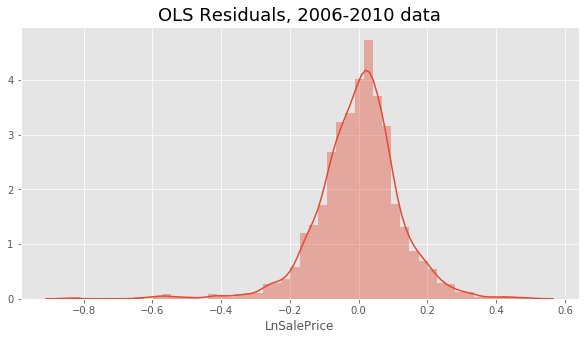

In [115]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(error_term, bins=50, kde=True, ax=ax)
plt.title("OLS Residuals, 2006-2010 data", fontsize=18)
plt.show()

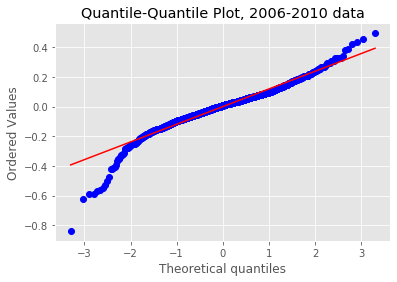

In [116]:
from scipy import stats
stats.probplot(error_term, dist="norm", plot=plt)
plt.title("Quantile-Quantile Plot, 2006-2010 data")
plt.show()

In [117]:
X_pred.isnull().sum()

Age                0
GrLivArea          0
BaseLivArea        1
Location           0
Amenities          0
RoadRail           0
BedroomAbvGr       0
Bathrooms          0
OverallCond        0
OverallQual        0
LotFrontage        0
LotArea            0
TwoStory_dum       0
FlatContour_dum    0
FlatRoof_dum       0
GarageArea         1
Garage_dum         0
CentralAirNum      0
LowQualFinSF       0
Fireplaces         0
KitchenQual_Ex     0
Zoning_2           0
Zoning_3           0
Zoning_4           0
YrSold_2007        0
YrSold_2008        0
YrSold_2009        0
YrSold_2010        0
dtype: int64

In [118]:
X_pred = X_pred.fillna(0)
X_pred.shape

(1459, 28)

In [119]:
X_pred.isnull().sum()


Age                0
GrLivArea          0
BaseLivArea        0
Location           0
Amenities          0
RoadRail           0
BedroomAbvGr       0
Bathrooms          0
OverallCond        0
OverallQual        0
LotFrontage        0
LotArea            0
TwoStory_dum       0
FlatContour_dum    0
FlatRoof_dum       0
GarageArea         0
Garage_dum         0
CentralAirNum      0
LowQualFinSF       0
Fireplaces         0
KitchenQual_Ex     0
Zoning_2           0
Zoning_3           0
Zoning_4           0
YrSold_2007        0
YrSold_2008        0
YrSold_2009        0
YrSold_2010        0
dtype: int64

In [120]:
X_pred = pd.DataFrame(scaler.fit_transform(X_pred), columns=X_pred.columns)
X_pred.head(10)

,Age,GrLivArea,BaseLivArea,Location,Amenities,RoadRail,BedroomAbvGr,Bathrooms,OverallCond,OverallQual,LotFrontage,LotArea,TwoStory_dum,FlatContour_dum,FlatRoof_dum,GarageArea,Garage_dum,CentralAirNum,LowQualFinSF,Fireplaces,KitchenQual_Ex,Zoning_2,Zoning_3,Zoning_4,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0.413771,-1.215588,0.251343,-0.447764,-0.149749,-0.260925,-1.029543,-1.170182,0.400766,-0.751101,0.505019,0.363929,-0.859637,0.335992,-0.069433,1.185945,0.237657,0.272716,-0.080483,-0.898055,-0.278474,-0.445926,-1.796938,-0.231148,-0.575504,-0.527923,-0.518359,2.810043
1,0.512386,-0.323539,0.901780,-0.447764,-0.149749,-0.260925,0.175997,-0.400089,0.400766,-0.054877,0.552974,0.897861,-0.859637,0.335992,-0.069433,-0.741213,0.237657,0.272716,-0.080483,-0.898055,-0.278474,-0.445926,0.556502,-0.231148,-0.575504,-0.527923,-0.518359,2.810043
2,-0.769616,0.294508,0.625710,0.480202,-0.149749,-0.260925,0.175997,1.140096,-0.497418,-0.751101,0.217286,0.809646,1.163282,0.335992,-0.069433,0.042559,0.237657,0.272716,-0.080483,0.647066,-0.278474,-0.445926,0.556502,-0.231148,-0.575504,-0.527923,-0.518359,2.810043
3,-0.802488,0.243004,0.230428,0.480202,-0.149749,-0.260925,0.175997,1.140096,0.400766,-0.054877,0.409108,0.032064,1.163282,0.335992,-0.069433,-0.012766,0.237657,0.272716,-0.080483,0.647066,-0.278474,-0.445926,0.556502,-0.231148,-0.575504,-0.527923,-0.518359,2.810043
4,-0.605257,-0.424487,-0.478569,1.408167,-0.149749,-0.260925,-1.029543,0.370003,-0.497418,1.337571,-1.269331,-0.971808,-0.859637,-2.976257,-0.069433,0.153210,0.237657,0.272716,-0.080483,-0.898055,-0.278474,-0.445926,0.556502,-0.231148,-0.575504,-0.527923,-0.518359,2.810043
5,-0.638128,0.348072,-1.028618,0.480202,-0.149749,-0.260925,0.175997,1.140096,-0.497418,-0.054877,0.265242,0.036505,1.163282,0.335992,-0.069433,-0.151078,0.237657,0.272716,-0.080483,0.647066,-0.278474,-0.445926,0.556502,-0.231148,-0.575504,-0.527923,-0.518359,2.810043
6,-0.605257,-0.616082,0.926878,0.480202,-0.149749,-0.260925,0.175997,0.370003,1.298950,-0.054877,0.313197,-0.371261,-0.859637,0.335992,-0.069433,-0.243287,0.237657,0.272716,-0.080483,-0.898055,-0.278474,-0.445926,0.556502,-0.231148,-0.575504,-0.527923,-0.518359,2.810043
7,-0.802488,-0.043358,-1.028618,0.480202,-0.149749,-0.260925,0.175997,1.140096,-0.497418,-0.054877,-0.310223,-0.286074,1.163282,0.335992,-0.069433,-0.367768,0.237657,0.272716,-0.080483,0.647066,-0.278474,-0.445926,0.556502,-0.231148,-0.575504,-0.527923,-0.518359,2.810043
8,-0.539513,-0.298818,0.303629,0.480202,-0.149749,-0.260925,-1.029543,-0.400089,-0.497418,0.641347,0.744796,0.072033,-0.859637,0.335992,-0.069433,0.153210,0.237657,0.272716,-0.080483,0.647066,-0.278474,-0.445926,0.556502,-0.231148,-0.575504,-0.527923,-0.518359,2.810043
9,0.117924,-1.244430,0.816031,-0.447764,-0.149749,-0.260925,-1.029543,-1.170182,-0.497418,-1.447325,0.025465,-0.286478,-0.859637,0.335992,-0.069433,0.240808,0.237657,0.272716,-0.080483,-0.898055,-0.278474,-0.445926,0.556502,-0.231148,-0.575504,-0.527923,-0.518359,2.810043


In [0]:
prediction = pd.DataFrame(np.arange(1461, 2920), columns=["Id"])
predicted_values = ols.predict(X_pred)
prediction["SalePrice"] = np.exp(predicted_values)
prediction.to_csv(r"/content/drive/My Drive/Colab Notebooks/House Price Prediction Kaggle's competition/Output/prediction.csv", index = False, header=True)